In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Function to extract GLCM features
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features = [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0]
    ]
    return features

In [14]:
# Function to load dataset and extract features
def load_dataset(healty_path, disease_path):
    features = []
    labels = []
    for filename in os.listdir(healty_path):
        img = cv2.imread(os.path.join(healty_path, filename))
        if img is not None:
            features.append(extract_glcm_features(img))
            labels.append(0)  # Label for healthy leaves

    for filename in os.listdir(disease_path):
        img = cv2.imread(os.path.join(disease_path, filename))
        if img is not None:
            features.append(extract_glcm_features(img))
            labels.append(1)  # Label for diseased leaves

    return np.array(features), np.array(labels)

In [15]:
# Define paths
train_healty_path = r'C:\Users\Omen\Desktop\test jupyter\grape_leafes_glcm_svm\dataset\training\healty'
train_disease_path = r'C:\Users\Omen\Desktop\test jupyter\grape_leafes_glcm_svm\dataset\training\disease'
test_healty_path = r'C:\Users\Omen\Desktop\test jupyter\grape_leafes_glcm_svm\dataset\testing\healty'
test_disease_path = r'C:\Users\Omen\Desktop\test jupyter\grape_leafes_glcm_svm\dataset\testing\disease'


In [16]:
# Load training and testing data
X_train, y_train = load_dataset(train_healty_path, train_disease_path)
X_test, y_test = load_dataset(test_healty_path, test_disease_path)


In [17]:
# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.79      0.95      0.86        20

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42

Confusion Matrix:
 [[17  5]
 [ 1 19]]


In [19]:
# Function to test new image and display result
def test_new_image(image_path, model):
    img = cv2.imread(image_path)
    features = extract_glcm_features(img)
    prediction = model.predict([features])[0]
    
    # Define label based on prediction
    label = "Healthy" if prediction == 0 else "Infected"
    
    # Display the image with the label
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()
    
    return prediction

In [20]:
# Function to test images in a directory
def test_images_in_directory(directory_path, model):
    for filename in os.listdir(directory_path):
        img_path = os.path.join(directory_path, filename)
        if os.path.isfile(img_path):
            prediction = test_new_image(img_path, model)
            print(f"Image: {filename}, Prediction: {'Healthy' if prediction == 0 else 'Infected'}")

In [21]:
# Path to the directory containing new images to test
new_images_directory = r'C:\Users\Omen\Desktop\test jupyter\grape_leafes_glcm_svm\dataset\real'


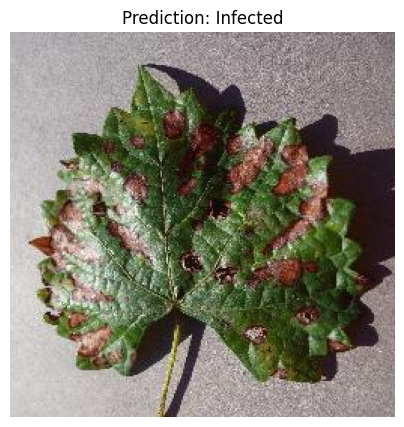

Image: 0b924439-fc64-42d3-9bf3-74a593a30b2b___FAM_B.Msls 3873.JPG, Prediction: Infected


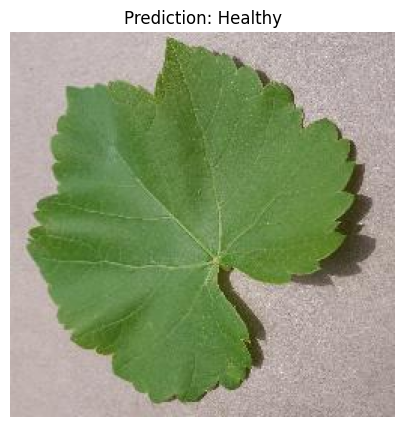

Image: 6f771370-1fb8-440e-a23f-4e0f29dbd65b___Mt.N.V_HL 6150.JPG, Prediction: Healthy


In [11]:
# Test images in the directory
test_images_in_directory(new_images_directory, model)